In [1]:
import numpy as np
from scipy import linalg
import math
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

Define ket vectors (zero, one) and identity $I$

In [2]:
zero = np.array([1, 0])
one = np.array([0, 1]) 
I = np.identity(2)

Define Pauli Matrices.

In [3]:
p_x = np.array([[0.,  1.], [1.,  0.]])
p_y = np.array([[0., -1j], [1j,  0.]])
p_z = np.array([[1.,  0.], [0., -1.]])

Define and check states for 2 qubit case. 

In [4]:
state00= np.kron(zero,zero)
state01= np.kron(zero,one)
state11= np.kron(one, one)
state10= np.kron(one, zero)

state00, state01, state11, state10

(array([1, 0, 0, 0]),
 array([0, 1, 0, 0]),
 array([0, 0, 0, 1]),
 array([0, 0, 1, 0]))

Define 2-qubit Quantum State Transfer Hamiltonian (Heisenberg Model) and check.

In [5]:
Hamiltonian = (np.kron(p_x,p_x) + np.kron(p_y,p_y) + np.kron(p_z,p_z))/2
Hamiltonian

array([[ 0.5+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j, -0.5+0.j,  1. +0.j,  0. +0.j],
       [ 0. +0.j,  1. +0.j, -0.5+0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0.5+0.j]])

Define unitary evolution and check if result is in expected form.

In [6]:
unitary = linalg.expm(Hamiltonian)

print(unitary)
unitary.shape

[[1.64872127+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.93592572+0.j 0.71279556+0.j 0.        +0.j]
 [0.        +0.j 0.71279556+0.j 0.93592572+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 1.64872127+0.j]]


(4, 4)

Define Time Evolution and check that at 0 we get identity.

In [7]:
def timeev(t):
    return linalg.expm(-1j*Hamiltonian*t)

timeev(0)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

Check initial time evolution for state10. 

In [8]:
timeev(0)@state10


array([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j])

Check at intervals, upto $\pi/2$.

In [9]:
timeev(0.392)@state10

array([0.        +0.j        , 0.07440084-0.37472276j,
       0.90645258+0.17997527j, 0.        +0.j        ])

In [10]:
timeev(0.785)@state10

array([0.        +0.j        , 0.27036028-0.65307515j,
       0.65359542+0.27057566j, 0.        +0.j        ])

In [11]:
timeev(1)@state10

array([0.        +0.j        , 0.40342268-0.73846026j,
       0.47415988+0.25903472j, 0.        +0.j        ])

In [12]:
final = timeev(math.pi/2)@state10
final 

array([0.00000000e+00+0.00000000e+00j, 7.07106781e-01-7.07106781e-01j,
       1.27810569e-16+1.43740670e-16j, 0.00000000e+00+0.00000000e+00j])

Check fidelity.

In [13]:
fidelity = abs(np.conjugate(state01.T)@final)
print(round(fidelity, 4))

1.0


As expected, state10 has transferred with full fidelity to state01 after one complete time evolution. We now plot the state transfer fidelity over time for the 2 qubit case. 

Text(0.5, 1.0, 'State Transfer for 2-qubit case.')

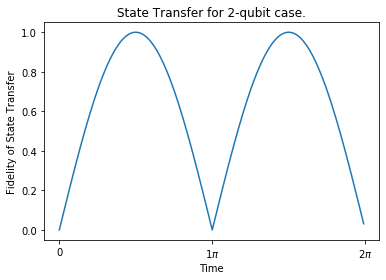

In [14]:
timeS=(math.pi)*np.arange(0,2,0.01)

def fidelity(S,evS):
    fidelity= abs(np.conjugate(S.T)@evS)
    return fidelity
f_list=[]

for t in timeS:
    evS=timeev(t)@state01
    f=fidelity(state10,evS)
    
    f_list.append(f)

f, ax=plt.subplots(1)
    
plt.plot(timeS, f_list)
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.xlabel("Time")
plt.ylabel("Fidelity of State Transfer")
plt.title('State Transfer for 2-qubit case.')